In [53]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [78]:
data = pd.read_csv('train_wn75k28.csv')
data_test_submit = pd.read_csv('test_Wf7sxXF.csv')
data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [79]:
data['products_purchased'] = data['products_purchased'].replace(np.nan, 0)
data_test_submit['products_purchased'] = data_test_submit['products_purchased'].replace(np.nan, 0)
data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [80]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['signup_date	'] = data['signup_date']
data['signup_date'] = pd.to_datetime(data['signup_date'])

data_test_submit['created_at'] = pd.to_datetime(data_test_submit['created_at'])
data_test_submit['signup_date	'] = data_test_submit['signup_date']
data_test_submit['signup_date'] = pd.to_datetime(data_test_submit['signup_date'])

In [81]:
data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,signup_date\t
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,2020-09-24
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,2020-09-19
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,2021-08-11
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-10-04
4,5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,2020-06-08


In [82]:
data['date_diff'] = data['created_at'] - data['signup_date']
data_test_submit['date_diff'] = data_test_submit['created_at'] - data_test_submit['signup_date']

In [83]:
data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,signup_date\t,date_diff
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,...,0,1,1,0,0,0,0,0,2020-09-24,99 days
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,...,0,1,0,0,0,0,0,0,2020-09-19,104 days
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,...,0,0,0,0,0,0,0,0,2021-08-11,-222 days
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,...,0,0,0,0,0,0,0,0,2017-10-04,1185 days
4,5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,...,0,1,0,0,0,1,0,0,2020-06-08,207 days


In [84]:
data['date_diff'] = data['date_diff']/np.timedelta64(1,'D')

data_test_submit['date_diff'] = data_test_submit['date_diff']/np.timedelta64(1,'D')
data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,signup_date\t,date_diff
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,...,0,1,1,0,0,0,0,0,2020-09-24,99.0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,...,0,1,0,0,0,0,0,0,2020-09-19,104.0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,...,0,0,0,0,0,0,0,0,2021-08-11,-222.0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,...,0,0,0,0,0,0,0,0,2017-10-04,1185.0
4,5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,...,0,1,0,0,0,1,0,0,2020-06-08,207.0


In [85]:
data['create_year'] = data['created_at'].dt.year
data_test_submit['create_year'] = data_test_submit['created_at'].dt.year

In [86]:
data['create_month'] = data['created_at'].dt.month
data_test_submit['create_month'] = data_test_submit['created_at'].dt.month

In [87]:
data['create_day'] = data['created_at'].dt.day
data_test_submit['create_day'] = data_test_submit['created_at'].dt.day

In [88]:
data.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,signup_date\t,date_diff,create_year,create_month,create_day
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,...,0,0,0,0,0,2020-09-24,99.0,2021,1,1
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,...,0,0,0,0,0,2020-09-19,104.0,2021,1,1
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,...,0,0,0,0,0,2021-08-11,-222.0,2021,1,1
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,...,0,0,0,0,0,2017-10-04,1185.0,2021,1,1
4,5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,...,0,0,1,0,0,2020-06-08,207.0,2021,1,1


In [89]:
data['signup_year'] = data['signup_date'].dt.year
data['products_purchased_original'] = data['products_purchased'].replace(0, np.nan)

data_test_submit['signup_year'] = data_test_submit['signup_date'].dt.year
data_test_submit['products_purchased_original'] = data_test_submit['products_purchased'].replace(0, np.nan)

In [90]:
data.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy', 'signup_date\t',
       'date_diff', 'create_year', 'create_month', 'create_day', 'signup_year',
       'products_purchased_original'],
      dtype='object')

In [91]:
data.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,date_diff,create_year,create_month,create_day,signup_year,products_purchased_original
count,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,...,39161.000000,39161.000000,39161.000000,39161.000000,24048.000000,39161.0,39161.000000,39161.000000,24048.000000,18250.000000
mean,19581.000000,6.523812,6.452746,1.003881,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,...,0.000383,0.218942,0.000562,0.051020,301.881944,2021.0,7.782258,16.017773,2020.262683,2.154137
std,11304.951283,3.472944,2.614296,1.199223,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,...,0.019568,0.431544,0.023696,0.220042,383.826637,0.0,3.139343,8.785966,1.107737,0.779815
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-445.000000,2021.0,1.000000,1.000000,2015.000000,1.000000
25%,9791.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.750000,2021.0,5.000000,8.000000,2020.000000,2.000000
50%,19581.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,238.000000,2021.0,8.000000,16.000000,2020.000000,2.000000
75%,29371.000000,9.000000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,532.000000,2021.0,10.000000,24.000000,2021.000000,3.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,...,1.000000,4.000000,1.000000,1.000000,2350.000000,2021.0,12.000000,31.000000,2022.000000,4.000000


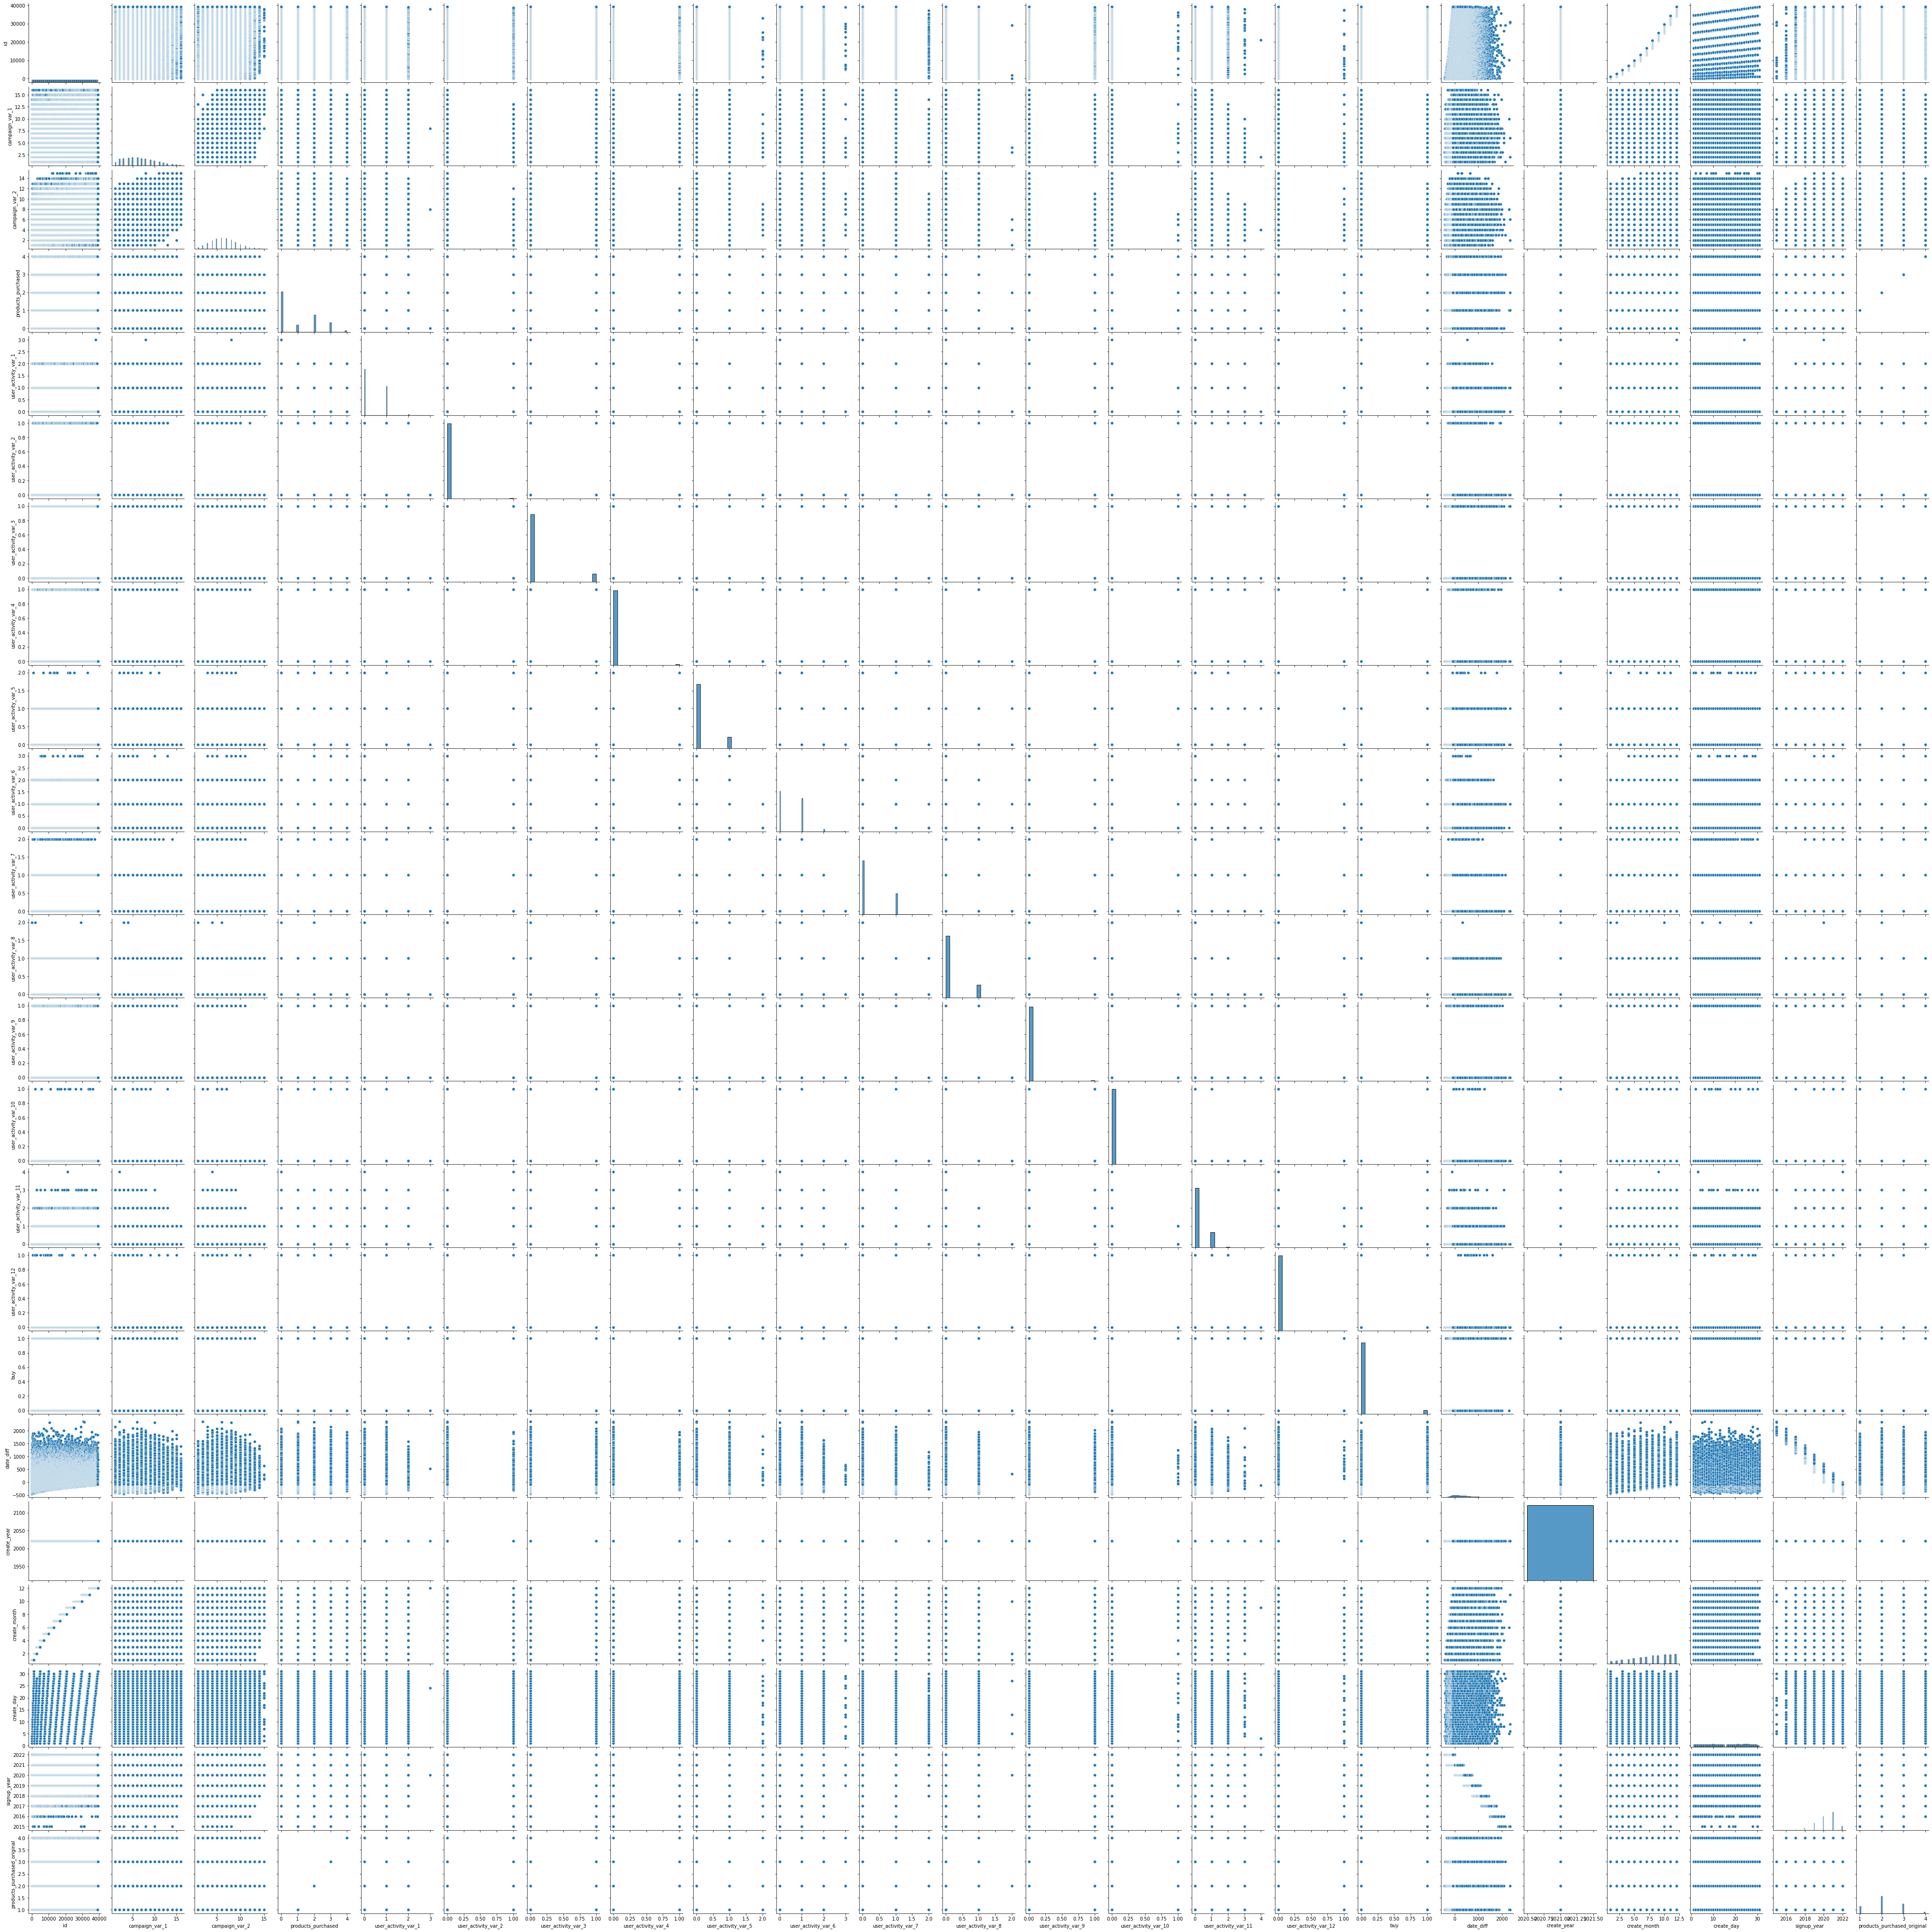

In [68]:
sns.pairplot(data)

In [69]:
data.corr(method='pearson', min_periods=1)

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,date_diff,create_year,create_month,create_day,signup_year,products_purchased_original
id,1.000000,0.143723,0.222746,-0.078714,0.012223,-0.011075,-0.000572,-0.015203,-0.006575,0.013992,...,0.001002,0.025785,-0.009223,-0.020762,0.089269,NaN,0.983210,0.077474,0.153489,-0.027862
campaign_var_1,0.143723,1.000000,0.561489,-0.114655,0.024100,-0.034548,-0.012670,-0.033510,-0.023116,0.029665,...,-0.004831,-0.022000,-0.006369,-0.087202,0.085573,NaN,0.146191,0.010508,-0.047498,-0.014415
campaign_var_2,0.222746,0.561489,1.000000,-0.072100,-0.032969,-0.039833,-0.008046,-0.038928,-0.030990,0.067304,...,-0.009879,-0.003890,-0.008228,-0.080064,0.063382,NaN,0.226230,0.017932,-0.010604,0.021305
products_purchased,-0.078714,-0.114655,-0.072100,1.000000,-0.025418,0.004166,0.015239,0.004052,0.012253,0.011332,...,0.008642,0.010743,-0.000975,0.005830,0.171363,NaN,-0.079828,-0.008896,-0.179036,1.000000
user_activity_var_1,0.012223,0.024100,-0.032969,-0.025418,1.000000,0.014599,-0.025950,0.016656,-0.015441,-0.190784,...,0.012811,-0.062915,0.002535,0.044811,0.011565,NaN,0.011240,-0.007086,-0.007588,-0.009479
user_activity_var_2,-0.011075,-0.034548,-0.039833,0.004166,0.014599,1.000000,-0.001075,0.132108,0.060982,-0.005297,...,0.046324,0.085794,0.024440,0.354627,0.030579,NaN,-0.009534,-0.002835,-0.030854,0.011023
user_activity_var_3,-0.000572,-0.012670,-0.008046,0.015239,-0.025950,-0.001075,1.000000,0.003023,0.023117,-0.050132,...,0.019152,-0.027212,0.013261,0.005174,-0.002900,NaN,0.000665,-0.008866,0.003412,0.000775
user_activity_var_4,-0.015203,-0.033510,-0.038928,0.004052,0.016656,0.132108,0.003023,1.000000,0.071339,-0.021669,...,0.046924,0.067085,0.037937,0.394706,0.043248,NaN,-0.015452,-0.006306,-0.047011,0.010831
user_activity_var_5,-0.006575,-0.023116,-0.030990,0.012253,-0.015441,0.060982,0.023117,0.071339,1.000000,-0.078928,...,0.028037,0.021225,0.022972,0.164972,0.045363,NaN,-0.007330,0.001645,-0.044365,-0.007867
user_activity_var_6,0.013992,0.029665,0.067304,0.011332,-0.190784,-0.005297,-0.050132,-0.021669,-0.078928,1.000000,...,0.001175,-0.076816,0.001938,-0.010951,-0.014165,NaN,0.014604,0.006317,0.022195,0.001855


In [96]:
data_test_submit.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,date_diff,create_year,create_month,create_day,signup_year,products_purchased_original
count,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.00000,13184.000000,13184.000000,...,13184.000000,13184.000000,13184.000000,13184.000000,6535.000000,13184.0,13184.000000,13184.000000,6535.000000,5048.000000
mean,45753.500000,7.724439,7.943416,0.807494,0.386681,0.004248,0.103307,0.00713,0.153064,0.525485,...,0.008419,0.000228,0.253413,0.000228,363.224484,2022.0,1.969205,15.235285,2020.633206,2.108954
std,3806.037309,3.599981,2.687832,1.134022,0.505653,0.065037,0.304371,0.08414,0.360695,0.565208,...,0.092200,0.015084,0.462698,0.015084,333.498104,0.0,0.823381,8.517181,0.990604,0.783483
min,39162.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-86.000000,2022.0,1.000000,1.000000,2015.000000,1.000000
25%,42457.750000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,98.000000,2022.0,1.000000,8.000000,2020.000000,2.000000
50%,45753.500000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,290.000000,2022.0,2.000000,15.000000,2021.000000,2.000000
75%,49049.250000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,548.000000,2022.0,3.000000,22.000000,2021.000000,3.000000
max,52345.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.00000,2.000000,3.000000,...,2.000000,1.000000,3.000000,1.000000,2321.000000,2022.0,3.000000,31.000000,2022.000000,4.000000


In [97]:
data_no_mv = data.dropna(subset=['date_diff'])
data_no_mv_train_submit = data_test_submit


In [99]:
data_no_mv_train_submit['date_diff'] = data_no_mv_train_submit['date_diff'].replace(np.nan, 365)
data_no_mv_train_submit.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,date_diff,create_year,create_month,create_day,signup_year,products_purchased_original
count,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.00000,13184.000000,13184.000000,...,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.0,13184.000000,13184.000000,6535.000000,5048.000000
mean,45753.500000,7.724439,7.943416,0.807494,0.386681,0.004248,0.103307,0.00713,0.153064,0.525485,...,0.008419,0.000228,0.253413,0.000228,364.119918,2022.0,1.969205,15.235285,2020.633206,2.108954
std,3806.037309,3.599981,2.687832,1.134022,0.505653,0.065037,0.304371,0.08414,0.360695,0.565208,...,0.092200,0.015084,0.462698,0.015084,234.789631,0.0,0.823381,8.517181,0.990604,0.783483
min,39162.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-86.000000,2022.0,1.000000,1.000000,2015.000000,1.000000
25%,42457.750000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,294.000000,2022.0,1.000000,8.000000,2020.000000,2.000000
50%,45753.500000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,365.000000,2022.0,2.000000,15.000000,2021.000000,2.000000
75%,49049.250000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,365.000000,2022.0,3.000000,22.000000,2021.000000,3.000000
max,52345.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.00000,2.000000,3.000000,...,2.000000,1.000000,3.000000,1.000000,2321.000000,2022.0,3.000000,31.000000,2022.000000,4.000000


In [100]:
data_train = data_no_mv[['create_year', 'create_month','campaign_var_1', 'campaign_var_2',
       'products_purchased', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12',
       'date_diff']]

data_train_submit = data_no_mv_train_submit[['create_year', 'create_month','campaign_var_1', 'campaign_var_2',
       'products_purchased', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12',
       'date_diff']]

In [101]:
data_train

,create_year,create_month,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,date_diff
0,2021,1,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,99.0
1,2021,1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,104.0
2,2021,1,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,-222.0
3,2021,1,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1185.0
4,2021,1,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0,207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39148,2021,12,9,6,0.0,0,0,0,0,0,1,0,0,0,0,1,0,628.0
39149,2021,12,1,5,3.0,0,0,0,0,0,0,1,0,0,0,0,0,225.0
39154,2021,12,7,11,3.0,0,0,0,0,0,1,0,0,0,0,0,0,423.0
39156,2021,12,11,11,2.0,1,0,0,0,1,1,1,0,0,0,0,0,1534.0


In [104]:
data_train_submit

,create_year,create_month,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,date_diff
0,2022,1,2,2,0.0,1,1,0,0,0,1,0,0,0,0,1,0,137.0
1,2022,1,4,7,3.0,1,0,0,0,0,0,0,1,0,0,0,0,590.0
2,2022,1,8,7,0.0,0,0,0,0,1,1,0,0,0,0,0,0,365.0
3,2022,1,9,8,2.0,0,0,0,0,1,1,1,0,0,0,2,0,558.0
4,2022,1,4,5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,2022,3,16,12,0.0,0,0,0,0,0,1,1,0,0,0,0,0,365.0
13180,2022,3,12,8,0.0,1,0,0,0,0,1,0,0,0,0,0,0,11.0
13181,2022,3,14,14,3.0,0,0,1,0,0,0,1,0,0,0,0,0,227.0
13182,2022,3,14,10,0.0,0,0,0,0,0,0,1,0,0,0,1,0,365.0


In [105]:
y = data_no_mv['buy']
y.shape

(24048,)

In [106]:
clf = RandomForestClassifier(n_jobs = 2, random_state = 0)
clf.fit(data_train, y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [107]:
data_test_submit = pd.read_csv('test_Wf7sxXF.csv')

In [108]:
pred = clf.predict(data_train_submit)

In [109]:
submission = pd.DataFrame()

In [112]:
submission['id'] = data_test_submit['id']

In [113]:
submission['buy'] = pred

In [114]:
submission

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0


In [115]:
submission.to_csv('submission.csv', index = False)